# Now Plot it out

Sentiment Analysis is already crazy fun, but how can we visualize it? In this exercise we will do just that!

## Instructions

Using Jupyter Notebook we are going to run sentiment analysis on "@SouthwestAir".

On top of you regular analysis, you should also keep track of how many tweets ago was it tweeted.

Next store our results into a pandas DataFrame and read results.

Finally create a plot with the follow labels.

* Title as "Sentiment Analysis of Tweet (`date`) for `Twitter Handle`.

* Y label as "Tweet Polarity"

* X label as "Tweets Ago"


In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Target Account
target_user = "@SouthwestAir"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)

    # Get all tweets from home feed

    # Loop through all tweets 

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [7]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.4215,Sun Jan 21 20:58:22 +0000 2018,0.808,0.192,0.000,1
1,0.9230,Sun Jan 21 20:58:13 +0000 2018,0.601,0.000,0.399,2
2,0.6124,Sun Jan 21 20:50:25 +0000 2018,0.693,0.080,0.226,3
3,0.8268,Sun Jan 21 20:48:27 +0000 2018,0.588,0.000,0.412,4
4,0.8555,Sun Jan 21 20:46:50 +0000 2018,0.682,0.000,0.318,5


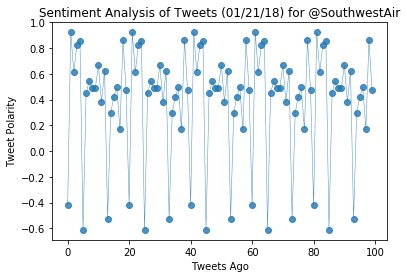

In [8]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
first_tweet = parser.parse(sentiments_pd["Date"][0])

# # Incorporate the other graph properties
plt.title(f"Sentiment Analysis of Tweets for {target_user} ({first_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()